# **Dardarin Regression Models with Random Forest**


---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## **2. Load the data set**

In [ ]:
df = pd.read_csv('dardarin_class_pIC50_pubchem_fp.csv')

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.isnull().any()

PubchemFP0      False
PubchemFP1      False
PubchemFP2      False
PubchemFP3      False
PubchemFP4      False
                ...  
PubchemFP877    False
PubchemFP878    False
PubchemFP879    False
PubchemFP880    False
pIC50           False
Length: 882, dtype: bool

In [ ]:
df = df.fillna(0)

## **3. Input features**
The **dardarin** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1836,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1837,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1838,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0       4.879426
1       7.795880
2       7.886057
3       8.107905
4       8.221849
          ...   
1835    8.744727
1836    8.200659
1837    8.455932
1838    6.000000
1839    6.703335
Name: pIC50, Length: 1840, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(1840, 881)

In [ ]:
Y.shape

(1840,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1840, 131)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((1472, 131), (1472,))

In [ ]:
X_test.shape, Y_test.shape

((368, 131), (368,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.45595721788203925

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

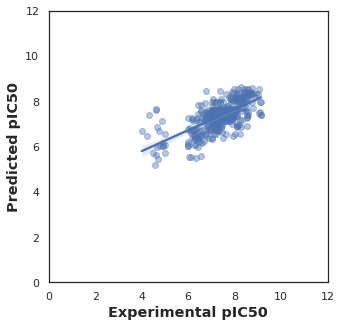

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Import Libraries**

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# **Load the data set**

In [ ]:
df = pd.read_csv('/content/dardarin_class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

# **Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(1840, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(1840, 131)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 93%|█████████▎| 39/42 [01:56<00:11,  3.78s/it]

[06:55:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [01:57<00:00,  2.80s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 90%|█████████ | 38/42 [01:42<00:14,  3.58s/it]

[06:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [01:43<00:00,  2.47s/it]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.83,0.85,0.35,0.24
ExtraTreeRegressor,0.83,0.85,0.35,0.12
ExtraTreesRegressor,0.83,0.85,0.35,3.62
GaussianProcessRegressor,0.83,0.85,0.35,0.91
RandomForestRegressor,0.79,0.81,0.39,1.52
BaggingRegressor,0.77,0.79,0.41,0.83
MLPRegressor,0.75,0.77,0.43,3.06
HistGradientBoostingRegressor,0.72,0.74,0.46,0.99
LGBMRegressor,0.72,0.74,0.46,0.26


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.13,0.44,0.63,1.51
BaggingRegressor,0.08,0.41,0.65,0.20
LGBMRegressor,0.07,0.40,0.65,0.24
HistGradientBoostingRegressor,0.07,0.40,0.65,2.12
NuSVR,0.07,0.40,0.65,0.32
SVR,0.06,0.40,0.66,0.36
DecisionTreeRegressor,0.04,0.38,0.66,0.06
KNeighborsRegressor,0.04,0.38,0.66,0.05
GradientBoostingRegressor,0.01,0.36,0.67,0.86


# **Data visualization of model performance**

[(0.0, 1.0)]

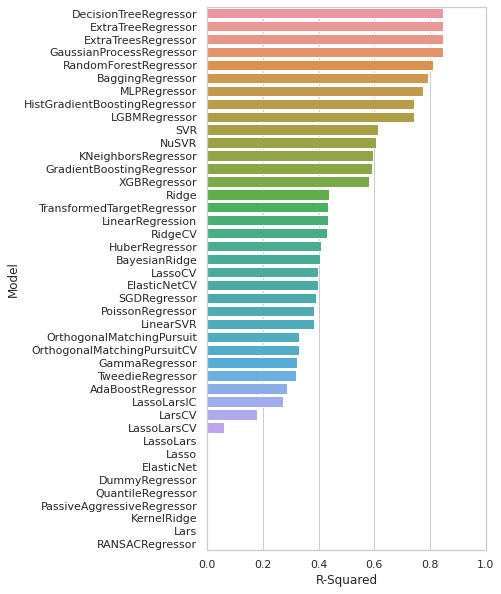

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

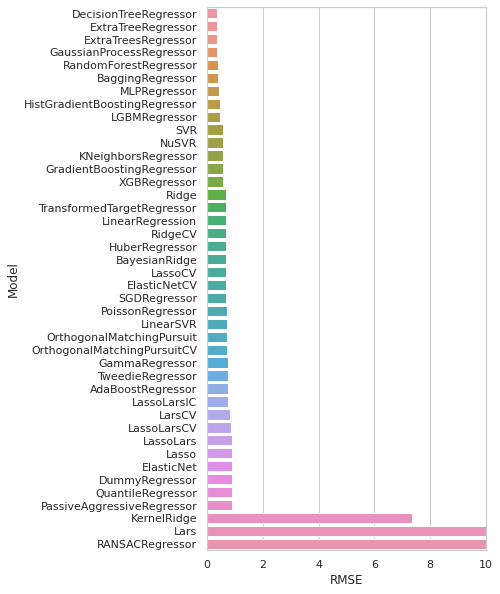

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

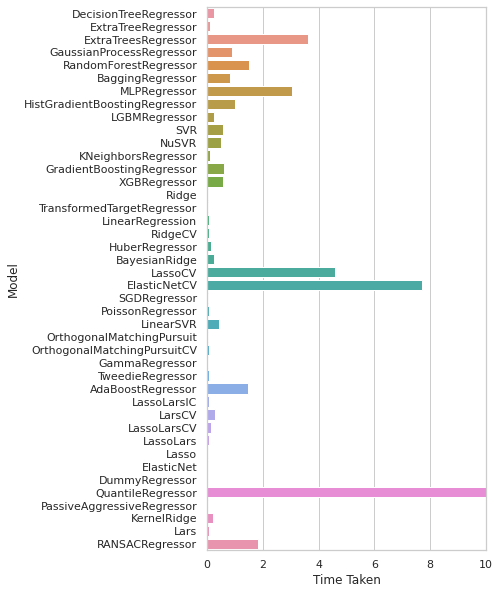

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))